In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
from preprocess._utils import Flavell2023Preprocessor, Nichols2017Preprocessor, Kato2015Preprocessor
from preprocess._pkg import *
import matplotlib.pyplot as plt
from data._main import *

In [164]:
config = OmegaConf.load("/home/lrvnc/Projects/worm-graph/conf/preprocess.yaml")
config['preprocess'].keys()
dataset = Flavell2023Preprocessor(
                                    transform=StandardScaler(),
                                    smooth_method=config.preprocess.smooth,
                                    resample_dt=config.preprocess.resample_dt,
)

In [165]:
filename = '/home/lrvnc/Projects/worm-graph/opensource_data/Flavell2023/2023-03-07-01.json'
data = dataset.load_data(filename)

In [166]:
data.keys()

dict_keys(['avg_timestep', 'rel_enc_str_θh', 'dorsalness', 'head_curvature', 'trace_array', 'angular_velocity', 'rel_enc_str_P', 'reversal_events', 'encoding_changing_neurons', 'feedingness', 'uid', 'ranges', 'labeled', 'velocity', 'body_curvature', 'forwardness', 'tau_vals', 'num_neurons', 'rel_enc_str_v', 'max_t', 'dataset_type', 'pumping', 'neuron_categorization'])

In [167]:
# Relevant features are: IDs, traces and time_vector

avg_time = data['avg_timestep'] # in MINUTES !
max_t = data['max_t']
raw_traces = data['trace_array']
ids = data['labeled']

In [168]:
seq_len = []
for trace in raw_traces:
    seq_len.append(len(trace))
seq_len = np.array(seq_len)
print(np.count_nonzero(np.where(seq_len != max_t)))
# All traces have the same length !

0


In [169]:
# Create time vector
avg_time *= 60 # in SECONDS !
print(avg_time)
raw_timeVectorSeconds = np.arange(0, max_t*avg_time, avg_time)

0.6015890336735932


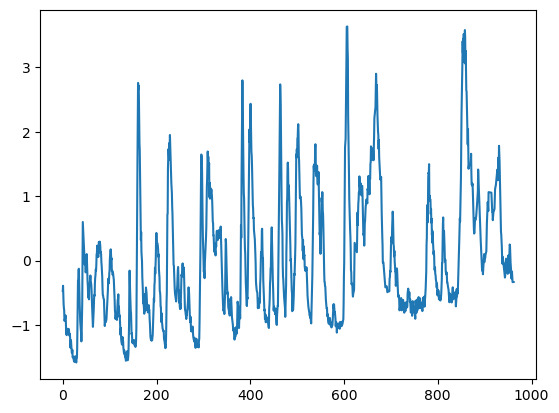

In [170]:
plt.plot(raw_timeVectorSeconds, raw_traces[0])

In [171]:
# all_traces is an array
all_traces = np.zeros((max_t, len(raw_traces)))
for i, trace in enumerate(raw_traces):
    all_traces[:,i] = trace
all_traces.shape

(1600, 153)

In [174]:
# We need to organize the data such as the traces are in the same order as the IDs

neuron_IDs = ['missing' for i in range(len(raw_traces))]

for i in ids.keys():
    label = ids[str(i)]['label']
    neuron_IDs[int(i)-1] = label


print(neuron_IDs)

# Treat the '?' labels
for i in range(len(neuron_IDs)):

    label = neuron_IDs[i]

    if label != 'missing':
        if '?' in label:
            # Find the group which the neuron belongs to
            label_split = label.split('?')[0]
            # Verify possible labels
            possible_labels = [neuron_name for neuron_name in NEURONS_302 if label_split in neuron_name]
            # Exclude possibilities that we already have
            possible_labels = [neuron_name for neuron_name in possible_labels if neuron_name not in neuron_IDs]
            # Random pick one of the possibilities
            neuron_IDs[i] = random.choice(possible_labels)
    
neuron_IDs = np.array(neuron_IDs)
print(neuron_IDs)
print(len(np.unique(neuron_IDs)))

['RID', 'RIMR', 'URYDR', 'RIH', 'RMDD?', 'missing', 'OLQVL', 'ADLL', 'missing', 'RMGL', 'RIML', 'IL2VR', 'missing', 'missing', 'missing', 'I1L', 'missing', 'missing', 'ADAL', 'missing', 'RMDVR', 'missing', 'missing', 'missing', 'OLLL', 'missing', 'URBR', 'ALA', 'missing', 'missing', 'CEPDR', 'SAAD?', 'RMDVL', 'AVAL', 'missing', 'missing', 'IL2VL', 'missing', 'missing', 'missing', 'missing', 'ASHR', 'IL1DR', 'URYVL', 'missing', 'ASHL', 'missing', 'M3R', 'RIVL', 'I1R', 'ASEL', 'CEPVL', 'IL1L', 'CEPVR', 'URADL', 'missing', 'I2R', 'AUAL', 'I2L', 'RMER', 'OLQDL', 'SMDDL', 'AVAR', 'AUAR', 'missing', 'URXL', 'AWCR', 'missing', 'BAGR', 'missing', 'missing', 'missing', 'missing', 'M3L', 'SAAD?', 'missing', 'missing', 'AVHL', 'missing', 'OLQDR', 'missing', 'missing', 'missing', 'missing', 'RMDD?', 'missing', 'AIBR', 'missing', 'missing', 'missing', 'URYVR', 'OLLR', 'URXR', 'missing', 'URBL', 'ASGL', 'missing', 'missing', 'NSML', 'RMDR', 'missing', 'missing', 'RMDL', 'AWBL', 'missing', 'missing',

In [91]:
# Sort and pick the unique neurons
neuron_IDs, unique_indices, _ = np.unique(neuron_IDs, return_counts=True, return_index=True)
print(len(neuron_IDs), neuron_IDs)
print(unique_indices)

# Reorganize the traces
all_traces = all_traces[:, unique_indices]  # only get data for unique neurons

153 ['100' '101' '104' '105' '108' '111' '116' '118' '119' '12' '120' '123'
 '124' '128' '13' '130' '131' '133' '134' '138' '14' '141' '145' '148'
 '150' '16' '17' '19' '21' '22' '23' '25' '28' '29' '34' '35' '37' '38'
 '39' '40' '44' '46' '5' '55' '64' '67' '69' '70' '71' '72' '75' '76' '78'
 '8' '80' '81' '82' '83' '85' '87' '88' '89' '93' '96' '97' 'ADAL' 'ADEL'
 'ADLL' 'AIBR' 'AINL' 'AIYL' 'AIYR' 'ALA' 'AQR' 'ASEL' 'ASGL' 'ASGR'
 'ASHL' 'ASHR' 'AUAL' 'AUAR' 'AVAL' 'AVAR' 'AVDL' 'AVER' 'AVHL' 'AVL'
 'AWAL' 'AWAR' 'AWBL' 'AWBR' 'AWCL' 'AWCR' 'BAGR' 'CEPDL' 'CEPDR' 'CEPVL'
 'CEPVR' 'FLPL' 'I1L' 'I1R' 'I2L' 'I2R' 'I3' 'IL1DR' 'IL1L' 'IL1R' 'IL2DL'
 'IL2VL' 'IL2VR' 'M3L' 'M3R' 'M4' 'MI' 'NSML' 'OLLL' 'OLLR' 'OLQDL'
 'OLQDR' 'OLQVL' 'OLQVR' 'RIAL' 'RICL' 'RID' 'RIH' 'RIML' 'RIMR' 'RIVL'
 'RMDDL' 'RMDDR' 'RMDL' 'RMDR' 'RMDVL' 'RMDVR' 'RMEL' 'RMER' 'RMEV' 'RMGL'
 'SAADL' 'SAADR' 'SMDDL' 'SMDDR' 'SMDVL' 'URADL' 'URAVL' 'URBL' 'URBR'
 'URXL' 'URXR' 'URYDR' 'URYVL' 'URYVR' 'VB02']
[100 101 10

In [94]:
all_traces[:, np.where(unique_indices == 0)[0]]

array([[-0.47278601],
       [-0.39202656],
       [-0.54950041],
       ...,
       [-0.33404995],
       [-0.33378048],
       [-0.33351097]])

In [95]:
raw_timeVectorSeconds.shape[0]

1600

In [144]:
print(NEURONS_302)

['ADAL', 'ADAR', 'ADEL', 'ADER', 'ADFL', 'ADFR', 'ADLL', 'ADLR', 'AFDL', 'AFDR', 'AIAL', 'AIAR', 'AIBL', 'AIBR', 'AIML', 'AIMR', 'AINL', 'AINR', 'AIYL', 'AIYR', 'AIZL', 'AIZR', 'ALA', 'ALML', 'ALMR', 'ALNL', 'ALNR', 'AQR', 'AS1', 'AS10', 'AS11', 'AS2', 'AS3', 'AS4', 'AS5', 'AS6', 'AS7', 'AS8', 'AS9', 'ASEL', 'ASER', 'ASGL', 'ASGR', 'ASHL', 'ASHR', 'ASIL', 'ASIR', 'ASJL', 'ASJR', 'ASKL', 'ASKR', 'AUAL', 'AUAR', 'AVAL', 'AVAR', 'AVBL', 'AVBR', 'AVDL', 'AVDR', 'AVEL', 'AVER', 'AVFL', 'AVFR', 'AVG', 'AVHL', 'AVHR', 'AVJL', 'AVJR', 'AVKL', 'AVKR', 'AVL', 'AVM', 'AWAL', 'AWAR', 'AWBL', 'AWBR', 'AWCL', 'AWCR', 'BAGL', 'BAGR', 'BDUL', 'BDUR', 'CANL', 'CANR', 'CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'DA1', 'DA2', 'DA3', 'DA4', 'DA5', 'DA6', 'DA7', 'DA8', 'DA9', 'DB1', 'DB2', 'DB3', 'DB4', 'DB5', 'DB6', 'DB7', 'DD1', 'DD2', 'DD3', 'DD4', 'DD5', 'DD6', 'DVA', 'DVB', 'DVC', 'FLPL', 'FLPR', 'HSNL', 'HSNR', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'I4', 'I5', 'I6', 'IL1DL', 'IL1DR', 'IL1L', 'IL1R', 'IL1VL', 'IL

# Verification
---

In [12]:
dataset = Flavell2023Preprocessor(
                                    transform=StandardScaler(),
                                    smooth_method=config.preprocess.smooth,
                                    resample_dt=config.preprocess.resample_dt,
)
preprocessed_Data = dataset.preprocess()

Finished processing Flavell2023!



In [101]:
nichols = Nichols2017Preprocessor(
                                    transform=StandardScaler(),
                                    smooth_method=config.preprocess.smooth,
                                    resample_dt=config.preprocess.resample_dt,
)

In [102]:
raw_data_nichols = nichols.load_data("n2_let.mat")["n2_let"]
neuron_IDs, traces, raw_timeVectorSeconds = nichols.extract_data(raw_data_nichols)
# Just one worm
neuron_IDs = neuron_IDs[0]
traces = traces[0]
raw_timeVectorSeconds = raw_timeVectorSeconds[0]

In [106]:
np.gradient(raw_timeVectorSeconds)

array([0.25568182, 0.25568182, 0.25568182, ..., 0.25568182, 0.25568182,
       0.25568182])

In [109]:
print('neuron_IDs: len = {}, traces: shape = {}, raw_timeVectorSeconds: len = {}'.format(len(neuron_IDs), traces.shape, len(raw_timeVectorSeconds)))

neuron_IDs: len = 117, traces: shape = (4224, 117), raw_timeVectorSeconds: len = 4224


In [135]:
config_Data = OmegaConf.load("/home/lrvnc/Projects/worm-graph/conf/dataset.yaml")
dataset_loaded = get_dataset(config_Data)

Chosen dataset(s): ['Flavell2023']
Num. worms: 1



In [136]:
print(dataset_loaded['worm0'].keys())

dict_keys(['dataset', 'smooth_method', 'worm', 'calcium_data', 'smooth_calcium_data', 'residual_calcium', 'smooth_residual_calcium', 'max_timesteps', 'time_in_seconds', 'dt', 'num_neurons', 'num_named_neurons', 'num_unknown_neurons', 'named_neurons_mask', 'unknown_neurons_mask', 'neurons_mask', 'slot_to_named_neuron', 'named_neuron_to_slot', 'slot_to_unknown_neuron', 'unknown_neuron_to_slot', 'slot_to_neuron', 'neuron_to_slot'])


In [137]:
named_neuron_to_slot = dataset_loaded['worm0']['named_neuron_to_slot']
named_neuron_to_slot

{'ADAL': 0,
 'ADEL': 2,
 'ADLL': 6,
 'AIBR': 13,
 'AINL': 16,
 'AIYL': 18,
 'AIYR': 19,
 'ALA': 22,
 'AQR': 27,
 'ASEL': 39,
 'ASGL': 41,
 'ASGR': 42,
 'ASHL': 43,
 'ASHR': 44,
 'AUAL': 51,
 'AUAR': 52,
 'AVAL': 53,
 'AVAR': 54,
 'AVDL': 57,
 'AVER': 60,
 'AVHL': 64,
 'AVL': 70,
 'AWAL': 72,
 'AWAR': 73,
 'AWBL': 74,
 'AWBR': 75,
 'AWCL': 76,
 'AWCR': 77,
 'BAGR': 79,
 'CEPDL': 84,
 'CEPDR': 85,
 'CEPVL': 86,
 'CEPVR': 87,
 'FLPL': 113,
 'I1L': 117,
 'I1R': 118,
 'I2L': 119,
 'I2R': 120,
 'I3': 121,
 'IL1DR': 126,
 'IL1L': 127,
 'IL1R': 128,
 'IL2DL': 131,
 'IL2VL': 135,
 'IL2VR': 136,
 'M3L': 142,
 'M3R': 143,
 'M4': 144,
 'MI': 148,
 'NSML': 149,
 'OLLL': 151,
 'OLLR': 152,
 'OLQDL': 153,
 'OLQDR': 154,
 'OLQVL': 155,
 'OLQVR': 156,
 'RIAL': 187,
 'RICL': 191,
 'RID': 193,
 'RIH': 198,
 'RIML': 199,
 'RIMR': 200,
 'RIVL': 205,
 'RMDDL': 207,
 'RMDDR': 208,
 'RMDL': 209,
 'RMDR': 210,
 'RMDVL': 211,
 'RMDVR': 212,
 'RMEL': 214,
 'RMER': 215,
 'RMEV': 216,
 'RMGL': 219,
 'SAADL': 223,


In [138]:
calcium_data = dataset_loaded['worm0']['smooth_calcium_data']
calcium_data.shape

torch.Size([1600, 302])

In [140]:
calcium_data[:, named_neuron_to_slot['RIMR']]

tensor([-0.9185, -0.9184, -1.0084,  ...,  0.0276,  0.0279,  0.0282])

In [271]:
dataset = Flavell2023Preprocessor(
                                    transform=StandardScaler(),
                                    smooth_method=config.preprocess.smooth,
                                    resample_dt=config.preprocess.resample_dt,
)


In [272]:
file_data = dataset.load_data("/home/lrvnc/Projects/worm-graph/opensource_data/Flavell2023/2023-01-05-01.json")
time_in_seconds, calcium_data, neurons = dataset.extract_data(file_data)

In [273]:
time_in_seconds.shape

(1615, 1)

In [274]:
calcium_data.shape

(1615, 138)

In [275]:
neurons.shape

(138,)

In [276]:
neurons

array(['0', '102', '112', '113', '114', '116', '118', '119', '124', '125',
       '126', '128', '130', '135', '138', '16', '17', '19', '2', '21',
       '23', '24', '27', '28', '30', '31', '33', '34', '37', '42', '48',
       '50', '55', '60', '61', '62', '63', '65', '66', '67', '69', '7',
       '78', '79', '80', '81', '84', '9', 'ADAL', 'ADEL', 'ADER', 'AIAL',
       'AIBL', 'AIBR', 'AIML', 'AIZL', 'AIZR', 'ALA', 'ASGL', 'ASKL',
       'ASKR', 'AUAL', 'AVAL', 'AVAR', 'AVDL', 'AVDR', 'AVEL', 'AVER',
       'AVHL', 'AVJL', 'AVJR', 'AVL', 'AWAL', 'AWBL', 'AWCL', 'CEPDL',
       'CEPDR', 'CEPVL', 'FLPL', 'I1L', 'I1R', 'I2L', 'I2R', 'I3', 'I4',
       'I6', 'IL1DL', 'IL1DR', 'IL1L', 'IL1R', 'IL1VL', 'IL1VR', 'IL2DR',
       'IL2VR', 'M1', 'M3L', 'M3R', 'M4', 'M5', 'MCL', 'MCR', 'MI',
       'NSML', 'NSMR', 'OLLL', 'OLLR', 'OLQDL', 'OLQDR', 'OLQVL', 'OLQVR',
       'RIAL', 'RIAR', 'RIBL', 'RICL', 'RICR', 'RID', 'RIH', 'RIMR',
       'RIR', 'RIVL', 'RIVR', 'RMDDL', 'RMDDR', 'RMDL', 'RMDVL',

In [255]:
unique_indices.shape

(91,)

In [235]:
unique_indices

array([120,  22, 104,  26, 103,  47,  51,  39, 100,  59, 109, 123,  32,
        35, 129,  38, 106, 121,  86,   3,  88,  64,  74,  75, 101, 131,
        85,  72, 136, 127, 108, 132,  77,  43,  92,  94, 137, 117,  49,
       110, 111, 133,  57, 122,  45,  15,  68,  87,  14,  95,   1,  29,
        58,  82, 107,  53, 105,  76,  96,  83,  93, 134, 115,  99,  11,
        54,  56,  41,   4,  73,  91,  90,  40,  25,   8,  10,  44,  18,
        98,  13,  52,   6,  12,  46,  36,  20,  70,  89,  71,   5,   0])

In [236]:
neuron_to_idx, num_named_neurons = dataset.create_neuron_idx(neurons)

In [216]:
len(neuron_to_idx), len(neurons)

(138, 139)